## SECOM Dataset

제조 공정 특성 선택 및 분류

개요: 반도체 제조 공정의 데이터

데이터 집합 특성: 다변량
row : 1567개
column : 591개

데이터 구성
독립 변수 : 수치형
종속 변수 : 이산형

데이터 특징
결측값 존재
타임 스탬프 존재
다수의 독립 변수 존재(591개)
종속 변수가 존재하고, 이산형임에 따라 분류 알고리즘 사용

데이터 내용
반도체 제조 공정에서 여러가지 센서 데이터가 존재하고, 그 센서 데이터와 종속된 결과가 존재.
결과는 -1이 정상, 1이 비정상으로 구분되어 있음.
데이터 타임스탬프는 해당 특정 시험 지점에 대한 것.


In [1]:
import pandas as pd
import numpy as np

uci = pd.read_csv("D:\\dataset\\Secom\\uci-secom.csv")
uci.head()

,Time,0,1,2,3,4,5,6,7,8,...,581,582,583,584,585,586,587,588,589,Pass/Fail
0,2008-07-19 11:55:00,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,...,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN,-1
1,2008-07-19 12:32:00,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,...,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1
2,2008-07-19 13:17:00,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,...,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1
3,2008-07-19 14:43:00,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,...,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1
4,2008-07-19 15:22:00,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,...,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1


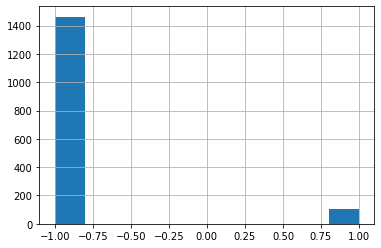

In [2]:
uci['Pass/Fail'].hist()

In [3]:
uci['Pass/Fail'].value_counts()

-1    1463
 1     104
Name: Pass/Fail, dtype: int64

In [4]:
uci.dropna(axis=1)

,Time,20,86,87,88,113,114,115,116,117,...,527,570,571,572,573,574,575,576,577,Pass/Fail
0,2008-07-19 11:55:00,1.4026,2.3895,0.9690,1747.6049,0.9460,0.0,748.6115,0.9908,58.4306,...,6.6926,533.8500,2.1113,8.95,0.3157,3.0624,0.1026,1.6765,14.9509,-1
1,2008-07-19 12:32:00,1.3825,2.3754,0.9894,1931.6464,0.9425,0.0,731.2517,0.9902,58.6680,...,8.8370,535.0164,2.4335,5.92,0.2653,2.0111,0.0772,1.1065,10.9003,-1
2,2008-07-19 13:17:00,1.4123,2.4532,0.9880,1685.8514,0.9231,0.0,718.5777,0.9899,58.4808,...,6.4568,535.0245,2.0293,11.21,0.1882,4.0923,0.0640,2.0952,9.2721,1
3,2008-07-19 14:43:00,1.4011,2.4004,0.9904,1752.0968,0.9564,0.0,709.0867,0.9906,58.6635,...,6.4865,530.5682,2.0253,9.33,0.1738,2.8971,0.0525,1.7585,8.5831,-1
4,2008-07-19 15:22:00,1.3888,2.4530,0.9902,1828.3846,0.9424,0.0,796.5950,0.9908,58.3858,...,6.3745,532.0155,2.0275,8.83,0.2224,3.1776,0.0706,1.6597,10.9698,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1562,2008-10-16 15:13:00,1.4072,2.3762,0.9861,1869.4215,0.9520,0.0,727.6761,0.9894,58.3514,...,2.6649,536.3418,2.0153,7.98,0.2363,2.6401,0.0785,1.4879,11.7256,-1
1563,2008-10-16 20:49:00,1.3949,2.4880,0.9911,1872.5133,0.9561,0.0,755.7527,0.9899,57.1020,...,6.0192,537.9264,2.1814,5.48,0.3891,1.9077,0.1213,1.0187,17.8379,-1
1564,2008-10-17 05:26:00,1.4256,2.4590,0.9869,1820.3629,0.9488,0.0,704.2686,0.9891,59.2046,...,5.4641,530.3709,2.3435,6.49,0.4154,2.1760,0.1352,1.2237,17.7267,-1
1565,2008-10-17 06:01:00,1.3868,2.3600,0.9796,1627.4714,0.9485,0.0,605.6190,0.9896,58.2686,...,6.5512,534.3936,1.9098,9.13,0.3669,3.2524,0.1040,1.7085,19.2104,-1


- 결측치 기준으로 값을 삭제하는건 원본 데이터의 반을 날려버리는 무모한 행위라고 판단되어 해당 컬럼의 평균값으로 대체
- 열 기준이 아닌 행 기준에서는 데이터에 큰 영향을 주진 않지만 데이터 원본의 훼손하는 일이라고 판단하여 평균값으로 대체함

In [5]:
uci.isnull().sum()

Time          0
0             6
1             7
2            14
3            14
             ..
586           1
587           1
588           1
589           1
Pass/Fail     0
Length: 592, dtype: int64

In [6]:
uci = uci.fillna(uci.mean())

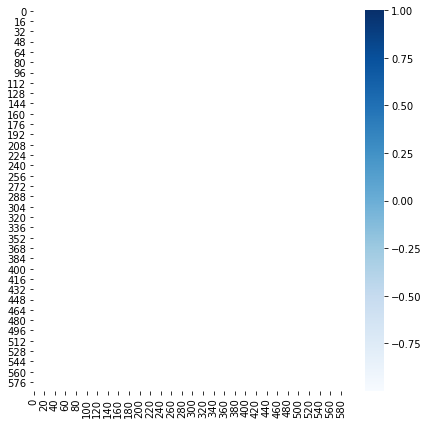

In [14]:
var_reduce_uci = uci.drop(['Time','Pass/Fail'],axis=1)

import seaborn as sns    
import matplotlib.pyplot as plt
plt.figure(figsize=(7,7))
sns.heatmap(data = var_reduce_uci .corr(), annot=False,
fmt = '.2f', linewidths=.5, cmap='Blues')

### 결측치 때문에 정상적으로 산출이 안되는 상황


In [15]:
var_reduce_uci.isnull().sum()

0      0
1      0
2      0
3      0
4      0
      ..
585    0
586    0
587    0
588    0
589    0
Length: 590, dtype: int64

### 데이터 자체는 결측치가 없으나 상관계수 출력하는 과정에서 결측치 존재

In [10]:
var_reduce_uci.corr()

,0,1,2,3,4,5,6,7,8,9,...,580,581,582,583,584,585,586,587,588,589
0,1.000000,-0.143840,0.004756,-0.007613,-0.011014,NaN,0.002270,0.031483,-0.052622,0.009045,...,-0.042208,-0.017120,0.000224,0.023453,0.019907,0.023589,0.018443,-0.025880,-0.028166,0.004174
1,-0.143840,1.000000,0.005767,-0.007568,-0.001636,NaN,-0.025564,-0.012037,0.031258,0.023964,...,0.047372,0.054006,0.043556,0.002904,-0.001264,0.002273,-0.009403,0.017266,0.010118,0.044797
2,0.004756,0.005767,1.000000,0.298935,0.095891,NaN,-0.136225,-0.146213,0.023528,0.016168,...,-0.012402,-0.007054,-0.006023,0.015697,0.018225,0.015752,-0.025495,-0.029345,-0.030818,-0.032890
3,-0.007613,-0.007568,0.298935,1.000000,-0.058483,NaN,-0.685835,0.073856,-0.102892,0.068215,...,-0.042177,-0.071311,0.008988,0.025436,0.024736,0.026019,0.034711,-0.039132,-0.033645,-0.080341
4,-0.011014,-0.001636,0.095891,-0.058483,1.000000,NaN,-0.074368,-0.347734,-0.025946,0.054206,...,-0.041256,0.088167,0.045081,-0.001300,-0.001597,-0.001616,-0.043929,-0.031005,-0.026100,0.050910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
585,0.023589,0.002273,0.015752,0.026019,-0.001616,NaN,-0.039517,0.010337,0.017925,-0.036109,...,-0.000277,-0.000471,-0.197363,0.999890,0.995342,1.000000,0.002743,-0.002930,-0.002530,-0.003800
586,0.018443,-0.009403,-0.025495,0.034711,-0.043929,NaN,-0.041209,0.058113,0.010433,0.033738,...,0.148954,-0.283333,-0.016726,0.002257,0.001605,0.002743,1.000000,0.167913,0.164238,-0.486559
587,-0.025880,0.017266,-0.029345,-0.039132,-0.031005,NaN,0.034027,-0.021426,0.022845,0.059301,...,0.670390,0.272404,-0.024473,-0.002649,-0.002498,-0.002930,0.167913,1.000000,0.974276,0.390813
588,-0.028166,0.010118,-0.030818,-0.033645,-0.026100,NaN,0.032227,-0.020893,0.026250,0.060758,...,0.682405,0.258745,-0.020705,-0.002260,-0.001957,-0.002530,0.164238,0.974276,1.000000,0.389211


In [16]:
var_reduce_uci.head()

,0,1,2,3,4,5,6,7,8,9,...,580,581,582,583,584,585,586,587,588,589
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,0.0162,...,0.005396,97.934373,0.5005,0.0118,0.0035,2.3630,0.021458,0.016475,0.005283,99.670066
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,-0.0005,...,0.006000,208.204500,0.5019,0.0223,0.0055,4.4447,0.009600,0.020100,0.006000,208.204500
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,0.0041,...,0.014800,82.860200,0.4958,0.0157,0.0039,3.1745,0.058400,0.048400,0.014800,82.860200
3,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,-0.0124,...,0.004400,73.843200,0.4990,0.0103,0.0025,2.0544,0.020200,0.014900,0.004400,73.843200
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,-0.0031,...,0.005396,97.934373,0.4800,0.4766,0.1045,99.3032,0.020200,0.014900,0.004400,73.843200


- 상관계수로 정상적인 결과가 출력되지 않음
- PCA등의 차원 축소기법의 결과를 기대하기 어려운 상황
- -> 클러스터링으로 변수간 관계를 통해 케이스를 나눠서 분석시행

In [17]:
kmeans_uci = var_reduce_uci.T

In [18]:
from sklearn.cluster import KMeans

kmeans = KMeans().fit(kmeans_uci)

In [19]:
pd.Series(kmeans.labels_).describe()

count    590.000000
mean       0.077966
std        0.553448
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        7.000000
dtype: float64

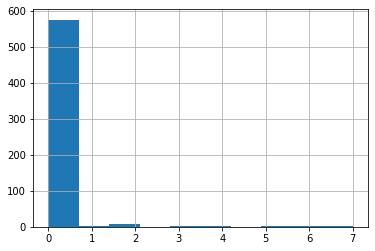

In [20]:
pd.Series(kmeans.labels_).hist()

In [21]:
pd.Series(kmeans.labels_).value_counts()

0    575
2      8
4      2
7      1
6      1
5      1
3      1
1      1
dtype: int64

- 클러스터링 결과 대다수의 변수가 0으로 쏠리고 그렇지 않은 소수의 클러스터가 존재함을 확인
- kmeans_uci table에 cluster_id라는 파생변수 추가하여 클러스터별 데이터 분기 작업 시행

In [22]:
kmeans_uci['cluster_id']= kmeans.labels_

In [23]:
pd.Series(kmeans.labels_).value_counts()

0    575
2      8
4      2
7      1
6      1
5      1
3      1
1      1
dtype: int64

- 레이블 확인 결과, 대부분의 column이 0의 클러스터를 가지고 나머지는 각각의 계수를 가짐
- 이를 토대로 cluster_id 계수로 데이터 분기 진행

Clustering 결과 7개의 군집으로 분기의 결과

- 16개의 컬럼으로 이루어진 결과.
- 두 집단의 columns의 수가 달라 학습결과 비교분석 불가능
- 이에 따라 일반 데이터로 Decision Tree 학습 진행